# Covid Hospitalization Rates

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing Data

In [2]:
path = r"C:\Users\Sasa\Downloads\data_table_for_rates_of_covid19-associated_hospitalizations_by_vaccination_status_in_adults.csv"
df = pd.read_csv(path, encoding='Latin1', skiprows=2)

Checking to see what the dataframe looks like

In [3]:
df.head()

,Week ending,Age group,Rate in unvaccinated,Rate in fully vaccinated
0,2021-01-30,18-49 yr,5.1,0.0
1,2021-01-30,50-64 yr,17.5,1.4
2,2021-01-30,65+ yr,31.3,0.0
3,2021-02-06,18-49 yr,5.6,0.0
4,2021-02-06,50-64 yr,14.1,0.0


Looked at the information about the dataframes to check the datat types, how many rows, etc

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Week ending               171 non-null    object 
 1   Age group                 171 non-null    object 
 2   Rate in unvaccinated      171 non-null    float64
 3   Rate in fully vaccinated  171 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.5+ KB


Dataframe looked ok, and wanted to check to see if there were any missing values.

In [5]:
df.isna().any()

Week ending                 False
Age group                   False
Rate in unvaccinated        False
Rate in fully vaccinated    False
dtype: bool

The "Week ending" column is listed as an object, but it needs to be converted to datetime, since these are dates.

In [6]:
#df["Week ending"] = pd.to_datetime(df["Week ending"])
df["Week ending"] = df["Week ending"].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Week ending               171 non-null    datetime64[ns]
 1   Age group                 171 non-null    object        
 2   Rate in unvaccinated      171 non-null    float64       
 3   Rate in fully vaccinated  171 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 5.5+ KB


Now, I wanted to 'groupby' age since the data is is given in age ranges

In [7]:
df.groupby(["Age group"]).count()

,Week ending,Rate in unvaccinated,Rate in fully vaccinated
Age group,,,
12-17 yr,27,27,27
18-49 yr,48,48,48
50-64 yr,48,48,48
65+ yr,48,48,48


It's difficult to tell what the information means so I will play around with some graphs

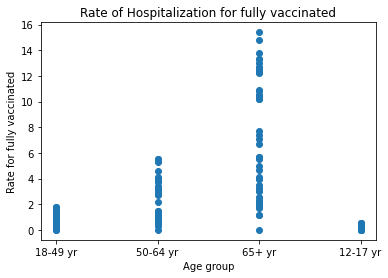

In [8]:
#X independent
#y dependent
plt.ylabel("Rate for fully vaccinated")
plt.xlabel("Age group")
plt.scatter(df["Age group"], df["Rate in fully vaccinated"])
plt.title("Rate of Hospitalization for fully vaccinated");

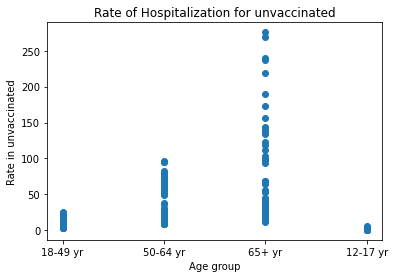

In [9]:
#X independent
#y dependent
plt.ylabel("Rate in unvaccinated")
plt.xlabel("Age group")
plt.scatter(df["Age group"], df["Rate in unvaccinated"])
plt.title("Rate of Hospitalization for unvaccinated");

The scatter plot shows greater rates for the 65+ age group

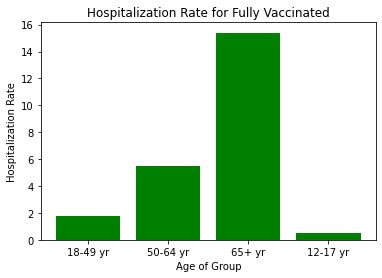

In [10]:
X = df["Age group"]
y = df["Rate in fully vaccinated"]
plt.xlabel("Age of Group")
plt.ylabel("Hospitalization Rate")

plt.bar(X, y, color="green")
plt.title("Hospitalization Rate for Fully Vaccinated");
plt.savefig("HRV.png")

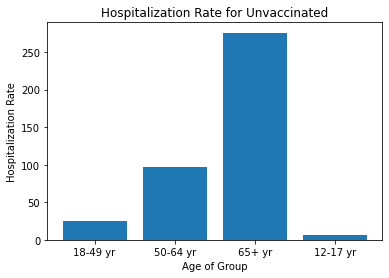

In [11]:
X = df["Age group"]
y =  df["Rate in unvaccinated"]
plt.xlabel("Age of Group")
plt.ylabel("Hospitalization Rate")
plt.bar(X, y)
plt.title("Hospitalization Rate for Unvaccinated");

In [12]:
df.head()

,Week ending,Age group,Rate in unvaccinated,Rate in fully vaccinated
0,2021-01-30,18-49 yr,5.1,0.0
1,2021-01-30,50-64 yr,17.5,1.4
2,2021-01-30,65+ yr,31.3,0.0
3,2021-02-06,18-49 yr,5.6,0.0
4,2021-02-06,50-64 yr,14.1,0.0


In [13]:
condition = df["Age group"].str.contains("65")

In [14]:
Vax65 = df[condition].copy()

In [15]:
Vax65.drop(["Age group"], axis=1, inplace=True)

In [16]:
Vax65

,Week ending,Rate in unvaccinated,Rate in fully vaccinated
2,2021-01-30,31.3,0.0
5,2021-02-06,37.2,7.1
8,2021-02-13,23.7,4.0
11,2021-02-20,17.9,7.7
14,2021-02-27,20.1,7.4
17,2021-03-06,19.1,2.2
20,2021-03-13,20.8,4.0
23,2021-03-20,38.1,4.1
26,2021-03-27,31.9,2.0
29,2021-04-03,45.3,5.0


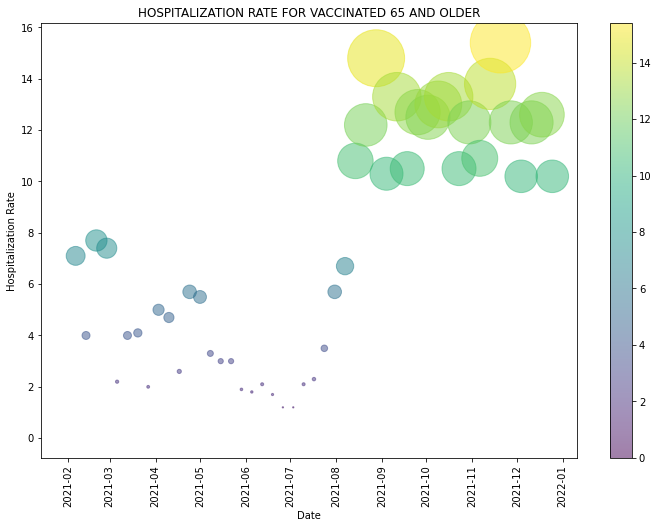

In [17]:
X = Vax65["Week ending"]
y = Vax65["Rate in fully vaccinated"]
plt.figure(figsize=(12,8))
plt.scatter(X,y, s=y**3, c=y, alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Hospitalization Rate")
plt.title("HOSPITALIZATION RATE FOR VACCINATED 65 AND OLDER")
plt.xticks(rotation=90)
plt.colorbar();

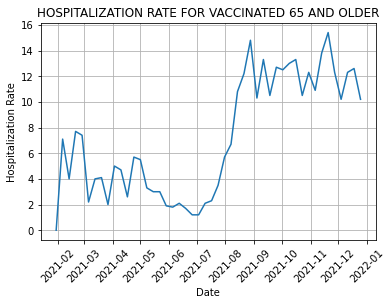

In [18]:
X = Vax65["Week ending"]
y = Vax65["Rate in fully vaccinated"]
fig, ax = plt.subplots()
ax.plot(X, y)

ax.set(xlabel="Date", ylabel="Hospitalization Rate",
       title="HOSPITALIZATION RATE FOR VACCINATED 65 AND OLDER")
ax.tick_params(axis='x', labelrotation = 45)
ax.grid()
plt.show()

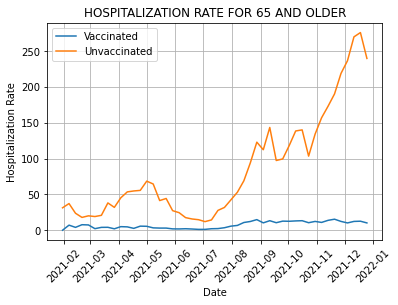

In [19]:
X = Vax65["Week ending"]
y = Vax65["Rate in fully vaccinated"]
y2 = Vax65["Rate in unvaccinated"]
fig, ax = plt.subplots()
ax.plot(X, y, label="Vaccinated")
ax.plot(X, y2, label="Unvaccinated")

ax.set(xlabel="Date", ylabel="Hospitalization Rate",
       title="HOSPITALIZATION RATE FOR 65 AND OLDER")
ax.tick_params(axis='x', labelrotation = 45)
ax.grid()
ax.legend()
plt.show();

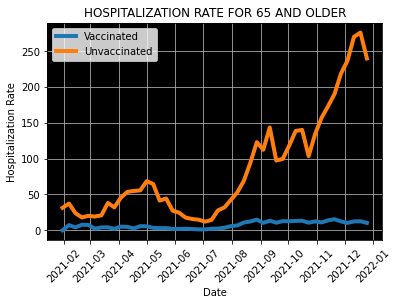

In [20]:
X = Vax65["Week ending"]
y = Vax65["Rate in fully vaccinated"]
y2 = Vax65["Rate in unvaccinated"]
fig, ax = plt.subplots()
ax.plot(X, y, label="Vaccinated", linewidth=4)
ax.plot(X, y2, label="Unvaccinated", linewidth=4)

ax.set(xlabel="Date", ylabel="Hospitalization Rate",
       title="HOSPITALIZATION RATE FOR 65 AND OLDER")
ax.tick_params(axis='x', labelrotation = 45)
ax.set_facecolor("black")
ax.grid()
ax.legend();